In [4]:
#Importing necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [8]:
#Parameters
dir = ""
BATCH_SIZE = 128
IMAGE_SIZE = 100

In [10]:
#loading in and preprocessing the train and test datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(dir+
    "fruits-360\Training",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(dir+
    "fruits-360/Test",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 41322 files belonging to 81 classes.
Found 13876 files belonging to 81 classes.


In [11]:
Train_class_names = train_dataset.class_names
Train_class_names

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Red',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Clementine',
 'Cocos',
 'Dates',
 'Granadilla',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Maracuja',
 'Melon Piel de Sapo',
 'Mulberry',
 'Nectarine',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Peach Flat',
 'Pear',
 'Pear Abate',
 'Pear Monster',
 'Pear Williams',
 'Pepino',
 'Physalis',
 'Physalis with Husk',
 'Pineapple',
 'Pineapple Mini',
 'Pitahaya Red',
 'Plum',
 'Pomegr

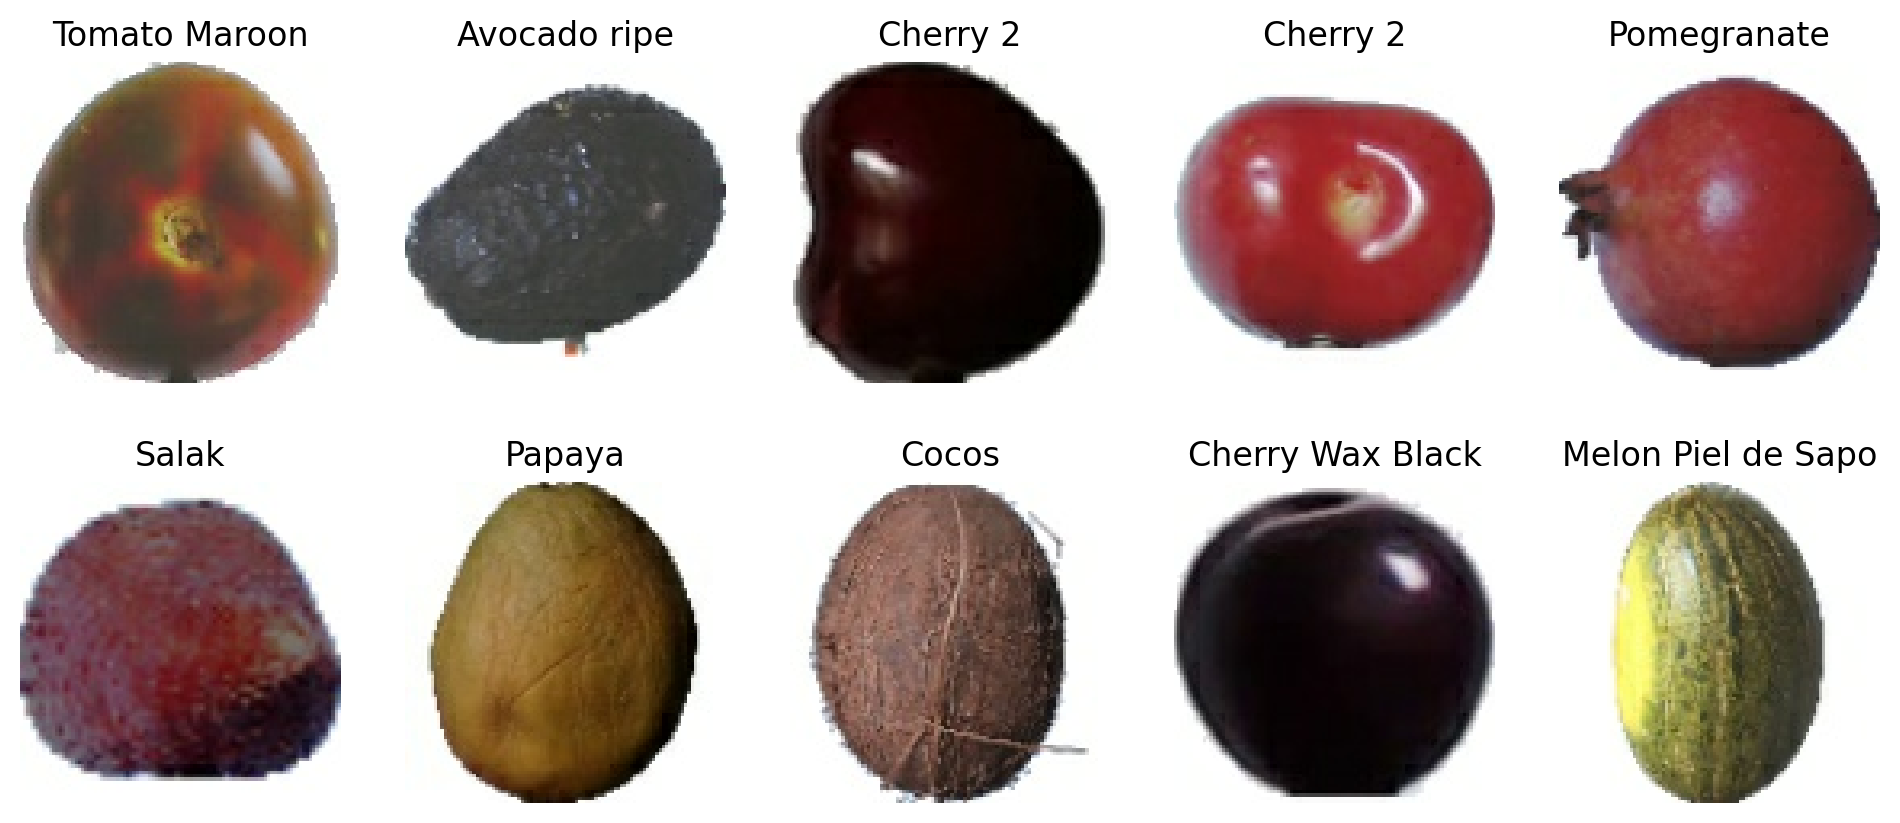

In [12]:
plt.figure(figsize=(12,5),dpi=200)
for image_batch, label_batch in train_dataset.take(1):
    for i in range(10): 
        ax = plt.subplot(2,5, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(Train_class_names[label_batch[i]])
        plt.axis('off')
# plt.savefig('/fruit-360/Visualizing.jpg')

In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

method 1

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(100, 100, 3)), #Rescaling
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), #This is the Convolutions layer
    
    tf.keras.layers.Conv2D(64, (3,3), activation ='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), #This is the Output layer
    tf.keras.layers.Dense(512, activation = 'relu'), #This is the Output layer
    tf.keras.layers.Dense(81)  #This is the Output layer
    ])

method 2

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       7

In [16]:
epochs=20
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/20
323/323 [==============================] - 327s 1s/step - loss: 0.6126 - accuracy: 0.8382 - val_loss: 0.4534 - val_accuracy: 0.8865
Epoch 2/20
323/323 [==============================] - 219s 676ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.2594 - val_accuracy: 0.9285
Epoch 3/20
323/323 [==============================] - 241s 746ms/step - loss: 0.0324 - accuracy: 0.9887 - val_loss: 0.1743 - val_accuracy: 0.9554
Epoch 4/20
323/323 [==============================] - 227s 703ms/step - loss: 0.0108 - accuracy: 0.9944 - val_loss: 0.1427 - val_accuracy: 0.9638
Epoch 5/20
323/323 [==============================] - 227s 704ms/step - loss: 0.0091 - accuracy: 0.9945 - val_loss: 0.1325 - val_accuracy: 0.9666
Epoch 6/20
323/323 [==============================] - 222s 687ms/step - loss: 0.0089 - accuracy: 0.9948 - val_loss: 0.1380 - val_accuracy: 0.9668
Epoch 7/20
323/323 [==============================] - 273s 844ms/step - loss: 0.1135 - accuracy: 0.9720 - val_loss: 0.5351 - va

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4),dpi=200)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('trainresult.jpg')
plt.show()

In [ ]:
test_precit_max = []
test_precit_second = []
test_precit_third = []
test_precit_fourth = []
test_precit_fifth = []

test_predictions = []
test_true = []

for test_images, test_labels in test_dataset:
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

    #Checking the label with the highest confidence value
    prediction_max = [np.argmax(predictions[i]) for i in range(len(predictions))]
    test_predictions += prediction_max
    test_true += (test_labels.tolist())
    test_precit_max += ((prediction_max==test_labels).tolist())
    #Checking the label with the top2 highest confidence value
    prediction_second = [[np.argsort(predictions[i])[-2],np.argmax(predictions[i])] 
                         for i in range(len(predictions))]
    test_precit_second += [test_labels[i] in prediction_second[i] for i in range(len(predictions))]
    #Checking the label with the top3 highest confidence value
    prediction_third = [[np.argsort(predictions[i])[-3],np.argsort(predictions[i])[-2],np.argmax(predictions[i])] 
                         for i in range(len(predictions))]
    test_precit_third += [test_labels[i] in prediction_third[i] for i in range(len(predictions))]
    #Checking the label with the top4 highest confidence value
    prediction_fourth = [[np.argsort(predictions[i])[-4],np.argsort(predictions[i])[-3],np.argsort(predictions[i])[-2],np.argmax(predictions[i])] 
                         for i in range(len(predictions))]
    test_precit_fourth += [test_labels[i] in prediction_fourth[i] for i in range(len(predictions))]
    #Checking the label with the top5 highest confidence value
    prediction_fifth = [[np.argsort(predictions[i])[-5],np.argsort(predictions[i])[-4],np.argsort(predictions[i])[-3],np.argsort(predictions[i])[-2],np.argmax(predictions[i])] 
                         for i in range(len(predictions))]
    test_precit_fifth += [test_labels[i] in prediction_fifth[i] for i in range(len(predictions))]
    
    

In [ ]:
plt.figure(figsize=(6,3),dpi=200)
y = [sum(test_precit_max)/len(test_precit_max),sum(test_precit_second)/len(test_precit_second),
           sum(test_precit_third)/len(test_precit_third),sum(test_precit_fourth)/len(test_precit_fourth),
           sum(test_precit_fifth)/len(test_precit_fifth)]
x = range(len(y))
xticks1 = ['max','2nd','3rd','4th','5th']
plt.bar(x,y,width = 0.35,align='center',alpha=0.8)
plt.xticks(x,xticks1,size='small',rotation=30)
plt.ylabel('accuracy')
plt.xlabel('confidence value')

for a,b in zip(x,y):

    plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=7)

plt.ylim(0.95,1)
plt.savefig('testresult.jpg')
plt.show()

In [ ]:
Test_class_names = test_dataset.class_names

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#confusion matrix
y_pred = test_predictions
y_true= test_true
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred)

false_labels = []
for i in range(len(conf_mat)):
    if (sum(conf_mat[i])-conf_mat[i][i])>10:
        false_labels.append(i)
        
df1 = conf_mat[false_labels]
conf_mat_adj = np.zeros((len(false_labels),len(false_labels)))
for i in range(len(false_labels)):
    conf_mat_adj[i] = df1[i][false_labels]

In [ ]:
#plot the con mat
f,ax=plt.subplots(figsize=(8,8),dpi=200)
sns.heatmap(conf_mat_adj,annot=True,fmt=".0f",cmap="YlGnBu")
plt.xticks(rotation=55)
plt.yticks(rotation=0)
ax.set_xticklabels([Test_class_names[i] for i in false_labels])
ax.set_yticklabels([Test_class_names[i] for i in false_labels])
plt.savefig('confusionmatrix.jpg')
plt.show()

In [ ]:
types_accuracy = [conf_mat[i][i]/conf_mat[i].sum() for i in range(len(conf_mat))]
types_result = pd.DataFrame(index=Test_class_names)
types_result['accuracy'] = types_accuracy
types_result = types_result.sort_values(by='accuracy')
types_result.to_csv('types_accuracy.csv')

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
y = types_result.head(15)['accuracy'].values
x = range(len(y))
xticks1 = types_result.head(15).index
plt.bar(x,y,width = 0.35,align='center',alpha=0.8)
plt.xticks(x,xticks1,rotation=30,fontsize=10)
plt.ylabel('Accuracy')
plt.xlabel('Fruits')

for a,b in zip(x,y):

    plt.text(a, b, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0.4,1)
plt.savefig('testresult_low.jpg')
plt.show()